# Credit Scoring

This project is dedicated to advancing the state of the art in credit scoring by developing a predictive model that estimates the probability of an individual facing financial distress within a two-year timeframe. Credit scoring is a fundamental tool used by banks to make informed lending decisions, influencing both the accessibility and terms of finance. The accuracy of these models plays a pivotal role in the economic and social fabric, affecting investment decisions and the overall functionality of market economies.

# Data

The project involves three primary datasets, each offering different perspectives and data points crucial for developing the predictive model:

## Training Data (cs-training.csv)
- `SeriousDlqin2yrs`: The person experienced 90 days past due delinquency or worse (Yes = 1, No = 0).
- `RevolvingUtilizationOfUnsecuredLines`: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
- `age`: Age of borrower in years.
- `NumberOfTime30-59DaysPastDueNotWorse`: The number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- `DebtRatio`: Monthly debt payments, alimony, and living costs divided by month gross income.
- `MonthlyIncome`: Monthly income.
- `NumberOfOpenCreditLinesAndLoans`: The number of open loans (installment like car loan or mortgage) and credit lines (e.g., credit cards).
- `NumberOfTimes90DaysLate`: Number of times borrower has been 90 days or more past due.
- `NumberRealEstateLoansOrLines`: Number of mortgage and real estate loans including home equity lines of credit.
- `NumberOfTime60-89DaysPastDueNotWorse`: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- `NumberOfDependents`: Number of dependents in the family excluding themselves (spouse, children, etc.).

## Test Data (cs-test.csv)

The test dataset shares the same structure as the training dataset but does not include the `SeriousDlqin2yrs` outcome variable, as it is used to assess the model's performance on unseen data.

## Sample Submission (sampleEntry.csv)

This file provides a template for submitting predictions. It contains two columns:

- `Id`: A unique identifier for each instance in the test set.
- `Probability`: The predicted probability of the event `SeriousDlqin2yrs` occurring.

# Data collection & preprocessing

In [81]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
#Loading data
train = pd.read_csv('data/cs-training.csv').drop(['Unnamed: 0'], axis=1)
test = pd.read_csv('data/cs-test.csv').drop(['Unnamed: 0'], axis=1)

In [83]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [84]:
#number of duplicate
train.duplicated().sum()

609

In [85]:
train.duplicated().value_counts()

False    149391
True        609
dtype: int64

# Data Cleaning

In [86]:
#dropping the duplicates
train_redup = train.drop_duplicates()

In [87]:
#Define a function to calculate the percentage of missing values
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [88]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [89]:
#Checking if we still have duplicates
train_redup.duplicated().sum()

0

In [90]:
#checking how data is looking like
train.shape

(150000, 11)

In [91]:
test.shape

(101503, 11)

In [92]:
train_redup.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [93]:
train_redup.shape

(149391, 11)

In [94]:
#cheking missing values
train_redup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [95]:
#cheking all missing values in NumberOfDependents
train_redup[train_redup.NumberOfDependents.isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


# Data Imputation

In [96]:
train_redup[train_redup.NumberOfDependents.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [97]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [98]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [99]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

/var/folders/6d/b1gsjpqs217gk90h_x_fnkj80000gn/T/ipykernel_1677/693308875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
/var/folders/6d/b1gsjpqs217gk90h_x_fnkj80000gn/T/ipykernel_1677/693308875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [100]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [101]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [102]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [103]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

/var/folders/6d/b1gsjpqs217gk90h_x_fnkj80000gn/T/ipykernel_1677/100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [104]:
#Check missing values again for non-missing family dataset
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [105]:
#Merge the filled datasets
filled_train = fam_nmiss.append(fam_miss)

/var/folders/6d/b1gsjpqs217gk90h_x_fnkj80000gn/T/ipykernel_1677/2022311766.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_train = fam_nmiss.append(fam_miss)


In [106]:
#Check for any remaining missing values
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [107]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [108]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [109]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [110]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [111]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [112]:
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

/Users/francoisgirard/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

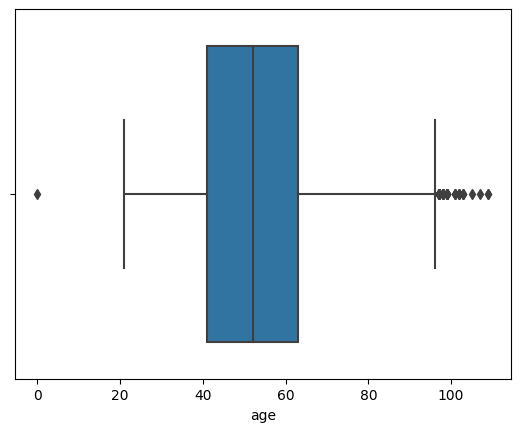

In [113]:
sns.boxplot(util_droped['age'])

In [114]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [115]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [116]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [117]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [118]:
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

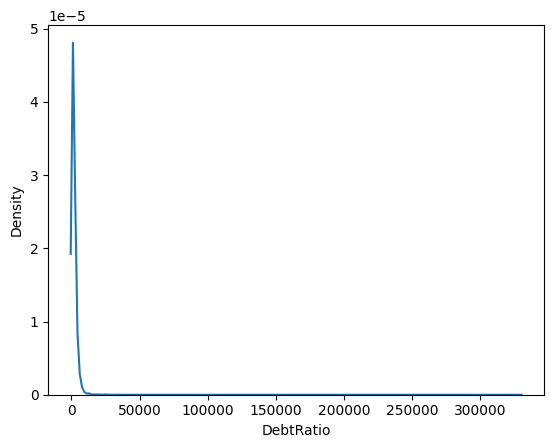

In [119]:
sns.kdeplot(util_droped['DebtRatio'])

In [120]:
util_droped['DebtRatio'].quantile([.975])

0.975    3492.0
Name: DebtRatio, dtype: float64

In [121]:
util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [122]:
#Analyze the distribution of past due variables
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In [123]:
#Drop entries with extreme values in past due variables
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

# Model Preparation

In [124]:
#Import librairies for model building
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [125]:
#Initialize the XGBoost classifier
model = XGBClassifier(tree_method = 'exact')

In [126]:
#Prepare the features (X) and target (y) for training
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

# Model Training

In [127]:
model.fit(x,y.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Model Evaluation

In [128]:
y_pred = model.predict(x)

In [129]:
accuracy_score(y,y_pred)

0.9465879759087976

In [130]:
cm = confusion_matrix(y,y_pred)
cm

array([[137977,    801],
       [  7145,   2845]])

Text(50.722222222222214, 0.5, 'actuals')

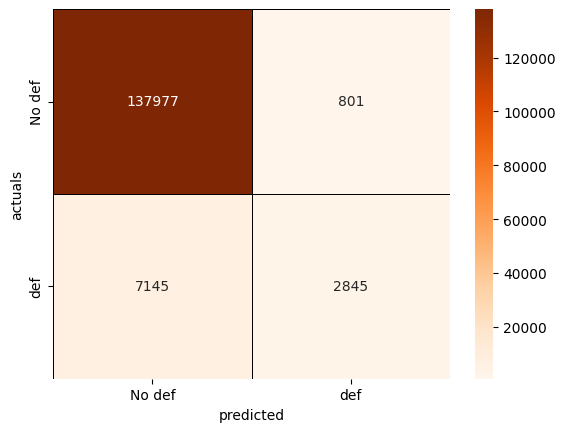

In [131]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [132]:
#Classification report for performance metrics
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.78      0.28      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.87      0.64      0.69    148768
weighted avg       0.94      0.95      0.93    148768



# Conclusion

We observed a high accuracy score of 94.65%. This indicates a strong overall performance in classifying the outcomes correctly. However, a deeper dive into the confusion matrix and classification report reveals a more nuanced picture:

- The model predicted the non-default class ('No def') with a high degree of precision (95%) and recall (99%), resulting in a commendable F1-score of 0.97 for this class. This robust performance for the majority class underscores the model's capability in identifying clear cases of creditworthiness.

- For the default class ('def'), while precision was relatively high at 78%, the recall was notably lower at 28%. This disparity resulted in a lower F1-score of 0.42, suggesting that the model is more conservative in predicting defaults, potentially missing out on identifying some riskier profiles.

- The heatmap of the confusion matrix visually confirms the model's tendency to favor predicting the non-default class, as evidenced by a larger number of false negatives (actual defaults not predicted by the model).

- The weighted average precision and recall of 94% and 95% respectively, with an F1-score of 0.93, reinforce the model's accuracy but also hint at an area for improvement, especially in recall for the default class.

While our model demonstrates high accuracy and precision in predicting loan repayment, the recall for the default class suggests room for improvement. For financial institutions, this model serves as a robust starting point for identifying and managing credit risk. However, to enhance the model's utility, further refinement is advised, specifically to improve default detection without significantly compromising precision. This could involve collecting more data, feature engineering, or exploring alternative algorithms to balance the precision-recall trade-off effectively.